A simple study of how the number of stainless steel product units (Prod)
produced varies and seems to depend on the width (Wid), density (Dens),
and tensile strength (Str) of the stainless steel sheet obtained from a
supplier

In [1]:
p1 <- read.table("P1.dat", header=TRUE)

In [2]:
attach(p1)

In [3]:
p1

Id,Prod,Wid,Dens,Str
1,763,19.8,128,86
2,650,20.9,110,72
3,554,15.1,95,62
4,742,19.8,123,82
5,470,21.4,77,52
6,651,19.5,107,72
7,756,25.2,123,84
8,563,26.2,95,83
9,681,26.8,116,76
10,579,28.8,100,64


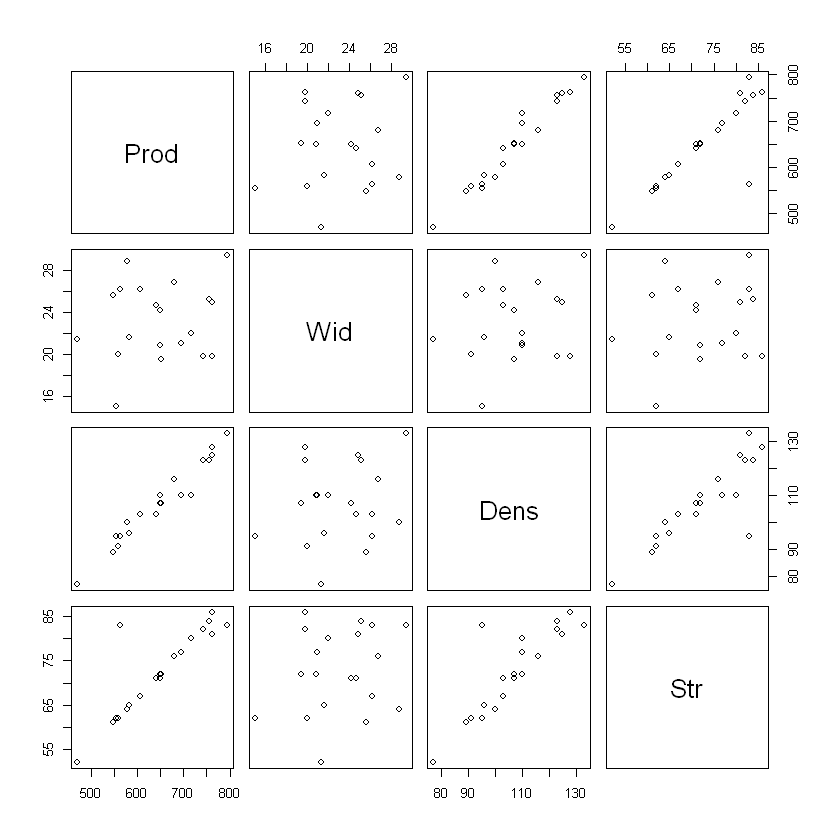

In [4]:
pairs(p1[2:5])

High correlation between 1) Prod & Dens, 2) Prod & Str and 3) Dens & Str. Low correlation between 4) Wid & Prod, 2) Wid & Dens and 3) Wid & Str.

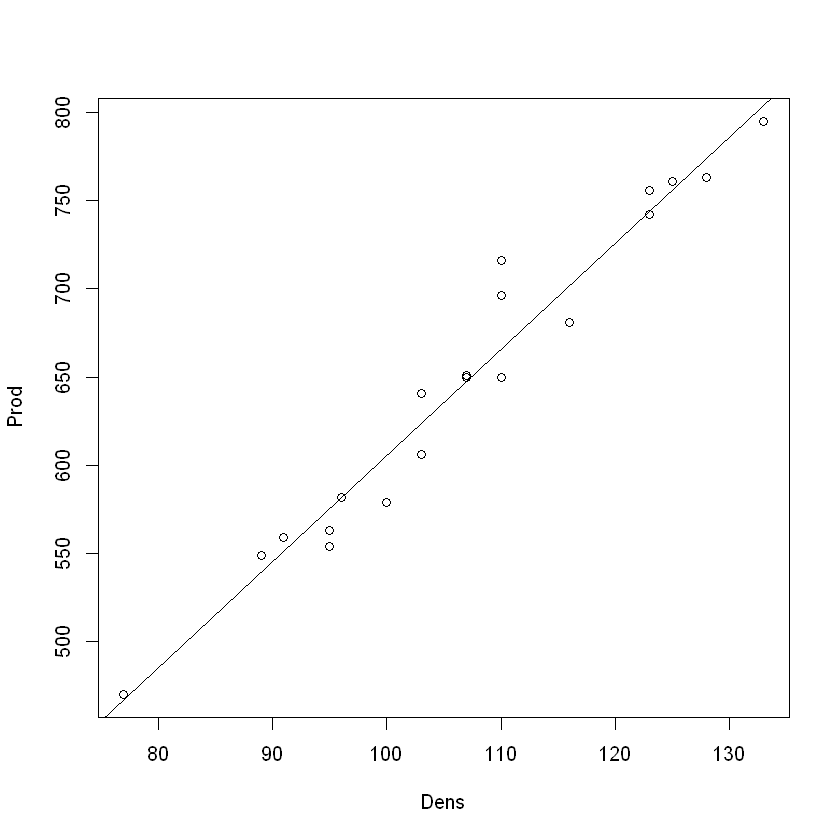

In [5]:
p1.mod <- lm(Prod~Dens)
plot(Prod~Dens)
abline(p1.mod)

In [6]:
anova(p1.mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Dens,1,145920.517,145920.5170,397.2018,1.023387e-13
Residuals,18,6612.683,367.3713,NA,NA


In [7]:
summary(p1.mod)


Call:
lm(formula = Prod ~ Dens)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.783 -13.512   1.192   7.875  50.051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.1180    32.6003   0.126    0.901    
Dens          6.0166     0.3019  19.930 1.02e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.17 on 18 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9542 
F-statistic: 397.2 on 1 and 18 DF,  p-value: 1.023e-13


H0: β1 =0
Ha: β1 ≠0
F = MSREG/s^2 = 397.2
F Statistics F(1, 18, 0.95) = 4.41
Therefore 397.2 > 4.41. Reject H0: β1 = 0 and therefore reject the idea that a linear relationship
between Prod and Dens might not exist, running the risk of less then 5% being wrong

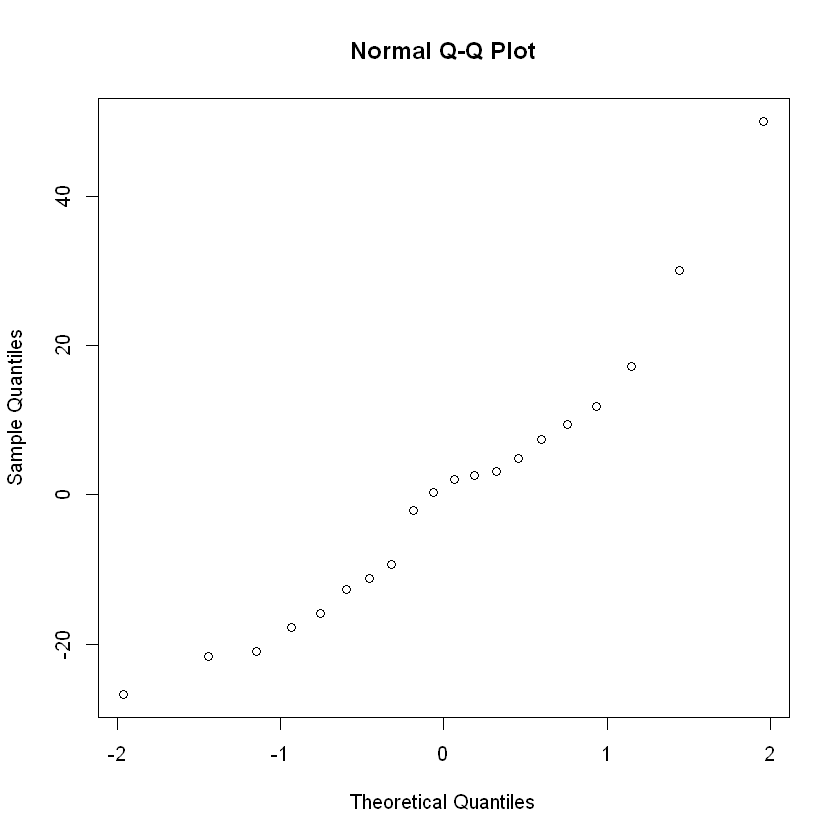

In [8]:
 qqnorm(resid(p1.mod))

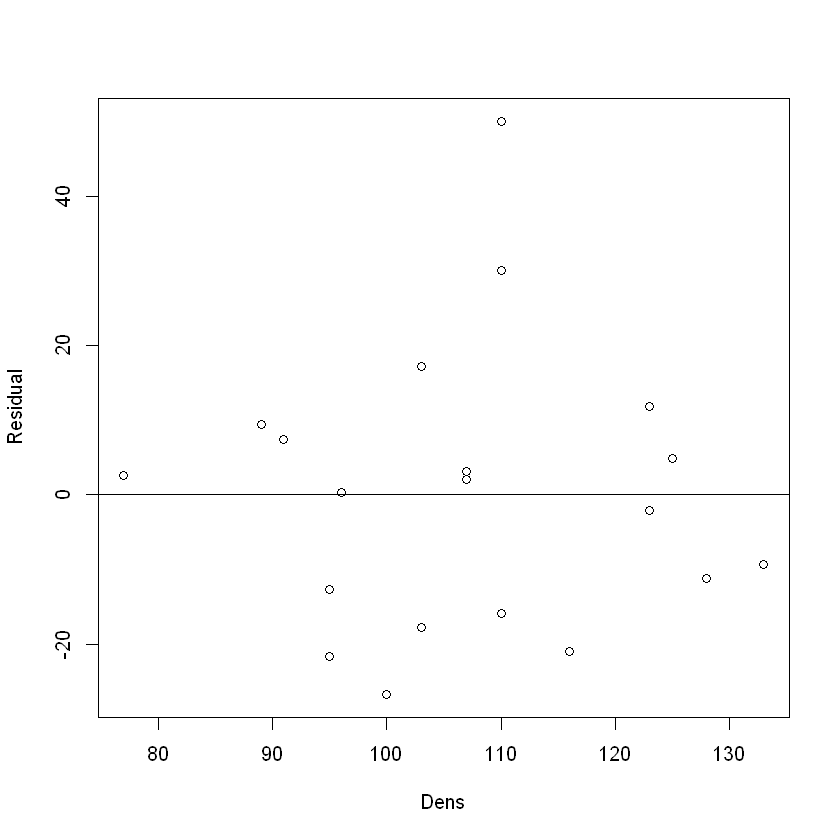

In [9]:
plot(resid(p1.mod)~Dens, ylab=c("Residual"))
abline(h=0)

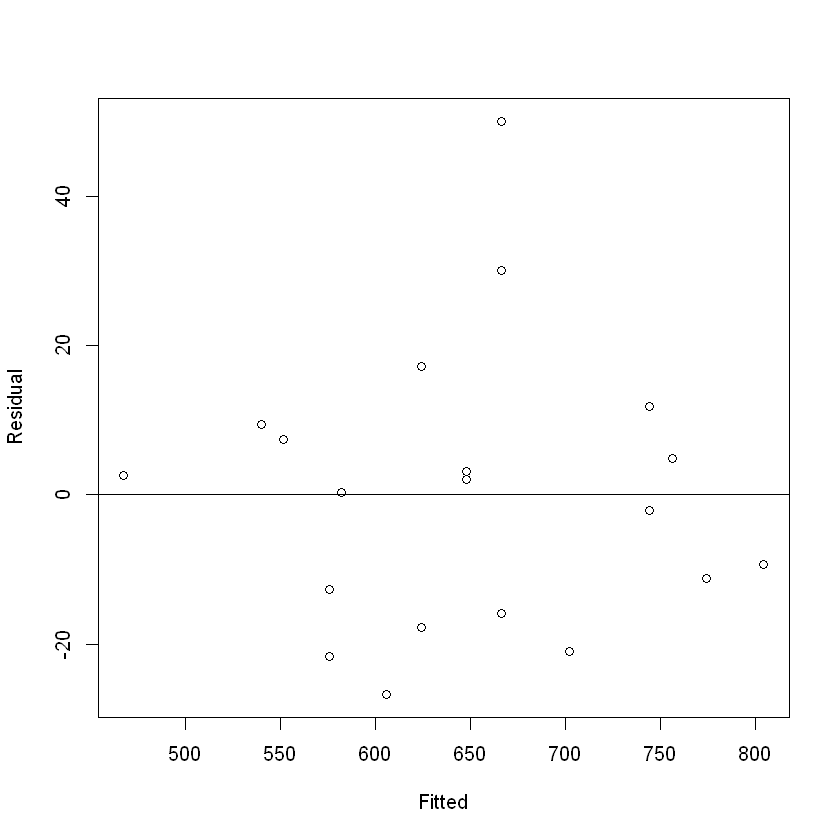

In [11]:
plot(resid(p1.mod)~fitted(p1.mod), ylab=c("Residual"), xlab=c("Fitted"))
abline(h=0)

The residual plots show a satisfactory horizontal band of points except for a likely outlier
residual 50.0508937. Normal probability plot show that most of the points lie on the main
middle bulk of the plot except for likely outliers residuals #11 (50.0508937) and #17
(30.0508937). Therefore the plots do not exhibit a denial of the normality assumption of
the error distribution.

In [13]:
p1.mod1 <- lm(Prod~Dens+Str+Wid)
p1.mod2 <- lm(Prod~Dens+Wid+Str)
summary(p1.mod1)


Call:
lm(formula = Prod ~ Dens + Str + Wid)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.330 -15.688   0.622   8.179  42.160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.3838    40.7015   0.157    0.877    
Dens          5.4090     0.5952   9.088 1.02e-07 ***
Str           1.1577     0.9092   1.273    0.221    
Wid          -0.9161     1.2430  -0.737    0.472    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.12 on 16 degrees of freedom
Multiple R-squared:  0.9617,	Adjusted R-squared:  0.9545 
F-statistic: 133.7 on 3 and 16 DF,  p-value: 1.534e-11


In [14]:
anova(p1.mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Dens,1,145920.5170,145920.5170,399.1606231,9.725256e-13
Str,1,565.0090,565.0090,1.5455629,2.317013e-01
Wid,1,198.5794,198.5794,0.5432072,4.717768e-01
Residuals,16,5849.0947,365.5684,NA,NA


In [15]:
anova(p1.mod2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Dens,1,145920.5170,145920.5170,399.160623,9.725256e-13
Wid,1,170.9043,170.9043,0.467503,5.039209e-01
Str,1,592.6840,592.6840,1.621267,2.211043e-01
Residuals,16,5849.0947,365.5684,NA,NA


H0: βDens = βStr = βWid =0
Ha: not all βi =0
F-statistic = SS(reg|b0)/(p-1) divide by SS(Residual)/(n-4) = 133.7
F(3,16, 0.95) = 3.24
Therefore since F-statistic 133.7 > 3.24, Reject H0: β1 = β2 = β3 =0 and therefore reject the idea
that a linear relationship between Prod, Wid, Dens and Str might not exist, running the risk of less
than 5% being wrong.

Next consider Sequential Sum of Squares for p1.mod1 [lm(Prod ~ Dens+Str+Wid), anova(p1.mod1)]
H0: βStr = βWid =0
Ha: not so
F = {(SSStr + SSWid)/(4-2)}/s^2, (where dof s^2 =20-4=16)
  = {(565 + 199)/2}/366 = 1.04
  
F(2, 16, 0.95) = 3.63
Therefore accept H0: βStr = βWid =0.

Next consider Partial Sum of Squares for p1.mod1 [lm(Prod ~ Dens+Str+Wid) , anova(p1.mod1)] for partial F-test of βWid under consideration. From anova table F (βWid)= 0.5432
F(1, 16, 0.95) = 4.49
Therefore indicating a statistically insignificant contribution of Wid to the equation.

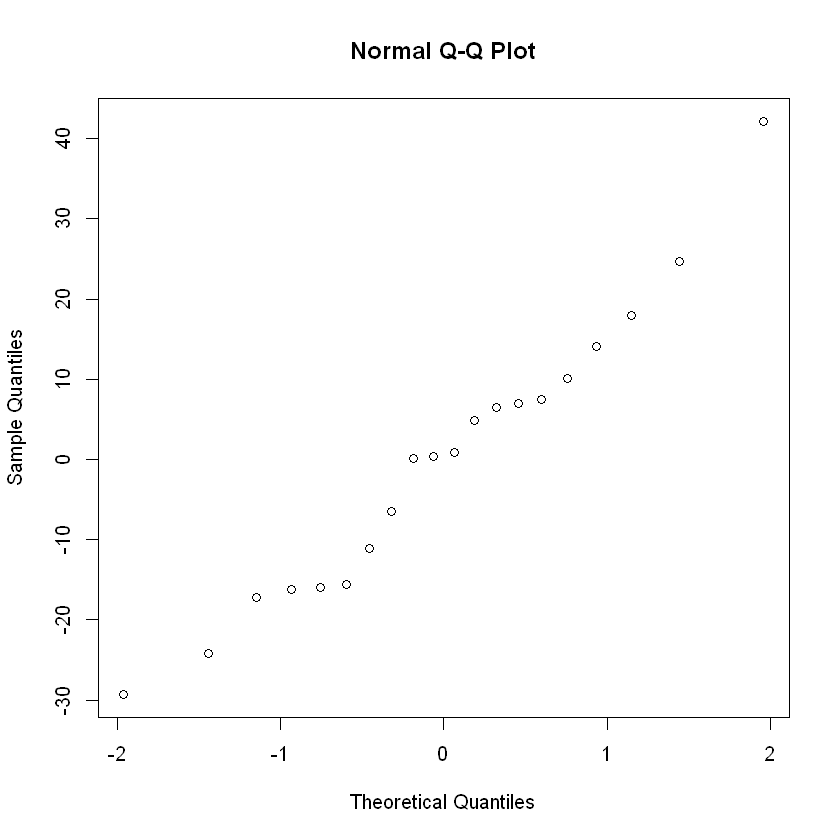

In [16]:
 qqnorm(resid(p1.mod1))

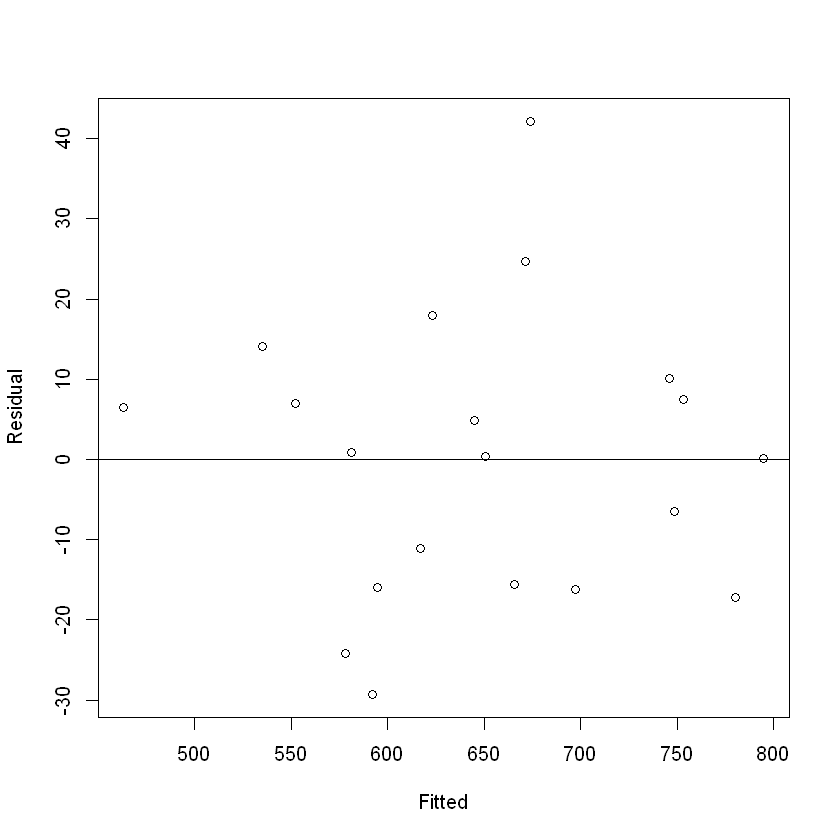

In [17]:
plot(resid(p1.mod1)~fitted(p1.mod1), ylab=c("Residual"), xlab=c("Fitted"))
abline(h=0)

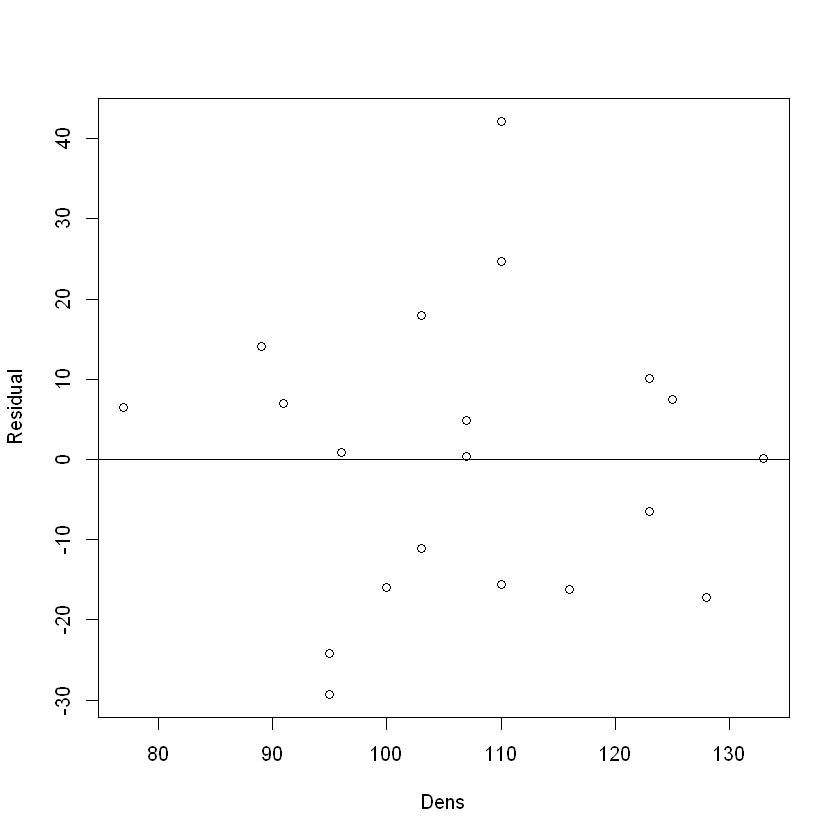

In [18]:
plot(resid(p1.mod1)~Dens, ylab=c("Residual"))
abline(h=0)

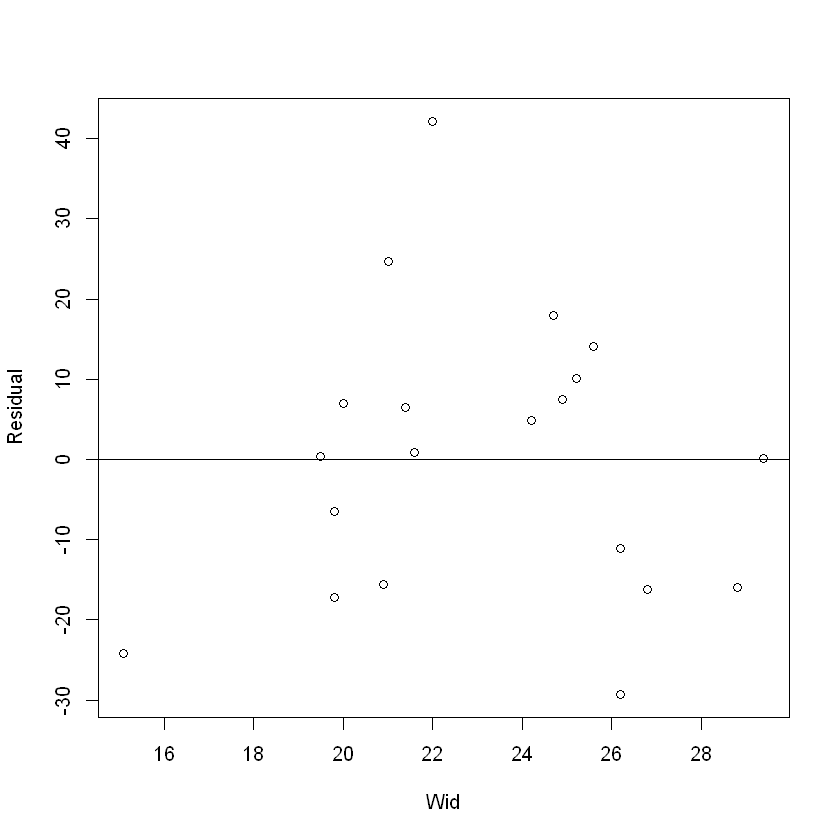

In [19]:
plot(resid(p1.mod1)~Wid, ylab=c("Residual"))
abline(h=0)

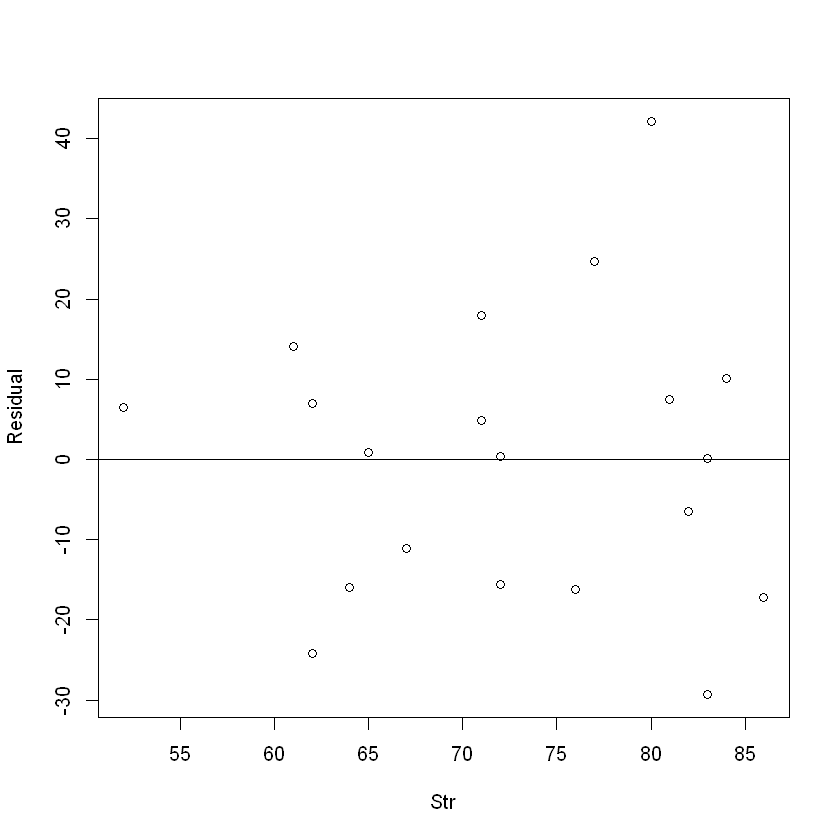

In [20]:
plot(resid(p1.mod1)~Str, ylab=c("Residual"))
abline(h=0)

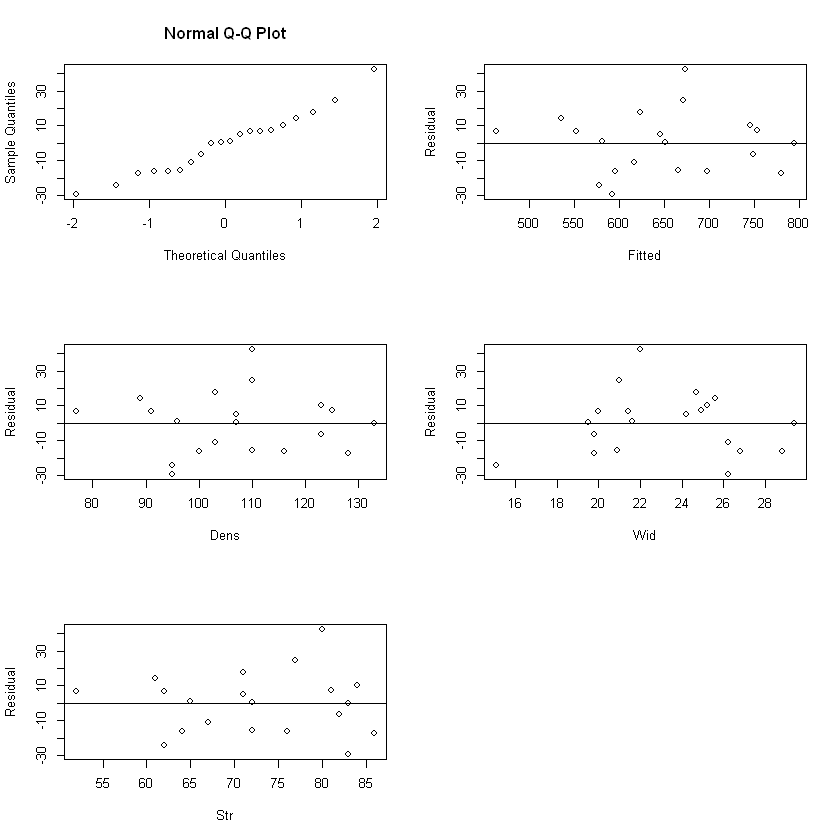

In [21]:
par(mfrow=c(3,2))
qqnorm(resid(p1.mod1))
plot(resid(p1.mod1)~fitted(p1.mod1), ylab=c("Residual"), xlab=c("Fitted"))
abline(h=0)
plot(resid(p1.mod1)~Dens, ylab=c("Residual"))
abline(h=0)
plot(resid(p1.mod1)~Wid, ylab=c("Residual"))
abline(h=0)
plot(resid(p1.mod1)~Str, ylab=c("Residual"))
abline(h=0)

The plots of Residual vs fitted Yhat, Residuals vs Str and Residuals vs Dens have the same pattern indicating that the fitted values Yhat are a linear function of the values of predictor variables Str and Dens. For the predictor variable Wid, the residual plot look different from the other 2 predictor variable residual plots but it also has an approx horizontal band. The outliers should only be discarded if there is evidence that it represents an error. The extra terms of βStr & βWid are unnecessary and could be removed from the model. The residual plots have a approx horizontal band indicating that there is no non-linearity in the data being fitted by the linear function.